# Расчестное задание №1. Варинат 12. Смыслов Алексей 2021-ФГиИБ-ПИ-1б

Параметры, необходимые для расчета (варинат 12):


*   Класс 1: P1 = 0.2, m1 = 12, d1 = 3
*   Класс 2: P2 = 0.4, m2 = 14, d1 = 1
*   Класс 3: P3 = 0.4, m3 = 17, d3 = 2


# Выполнение работы.

# 1. Найти все разделяющие точки для пар K1-K2, K1-K3, K2-K3.

Для начала необходимо определить функции правдоподобия для каждого класса. Функция правдоподобия для нормально распределённой случайной величины выражается через её плотность вероятности, умноженную на априорную вероятность класса. Для нормального распределения с параметрами $m$ (среднее значение) и $d$ (стандартное отклонение) функция плотности вероятности $f(x)$ имеет вид:

$f(x) = \frac{1}{\sqrt{2\pi} d} e^{-\frac{(x-m)^2}{2d^2}}$

Тогда функция правдоподобия для класса $i$ будет:

$P_i(x) = P_i \cdot \frac{1}{\sqrt{2\pi} d_i} e^{-\frac{(x-m_i)^2}{2d_i^2}}$

Чтобы найти разделяющие точки между классами, нужно решить уравнение, приравнивая функции правдоподобия двух классов. Например, для точек между классами 1 и 2 уравнение будет:

$P_1 \cdot \frac{1}{\sqrt{2\pi} d_1} e^{-\frac{(x-m_1)^2}{2d_1^2}} = P_2 \cdot \frac{1}{\sqrt{2\pi} d_2} e^{-\frac{(x-m_2)^2}{2d_2^2}}$

После логарифмирования и упрощения получится квадратное уравнение относительно $x$, которое можно решить для нахождения разделяющих точек. Аналогично поступаем для классов 2 и 3.

Приступим к нахождению разделяющих точек.

Для этого будем использовать Python, библиотеку Scipy. Из библиотеки Scipy будем использовать функцию fsolve, которая позволяет решать системы нелинейных уравнений численно.

# Старый варинат нахождения разделяющих точек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.stats import norm

P1, m1, d1 = 0.2, 12, 3
P2, m2, d2 = 0.4, 14, 1
P3, m3, d3 = 0.4, 17, 2


# Функция правдоподобия для нормально распределённого класса
def likelihood(x, P, m, d):
    return P * norm.pdf(x, m, d)

# Функции правдоподобия для классов, определенные ранее
def likelihood_class_1(x):
    return likelihood(x, P1, m1, d1)

def likelihood_class_2(x):
    return likelihood(x, P2, m2, d2)

def likelihood_class_3(x):
    return likelihood(x, P3, m3, d3)

# Функция для нахождения точек пересечения между двумя классами
def find_intersection(f1, f2, x0):
    return fsolve(lambda x: f1(x) - f2(x), x0)

# Начальное приближение для точек пересечения, основанное на средних значениях классов
initial_guess_1_2 = (m1 + m2) / 2 # для классов 1 и 2
initial_guess_1_3 = (m1 + m3) / 2 # для классов 1 и 3
initial_guess_2_3 = (m2 + m3) / 2 # для классов 2 и 3

# Находим численные решения для точек пересечения
intersection_1_2 = find_intersection(likelihood_class_1, likelihood_class_2, initial_guess_1_2) # для классов 1 и 2
intersection_1_3 = find_intersection(likelihood_class_1, likelihood_class_3, initial_guess_1_3) # для классов 1 и 3
intersection_2_3 = find_intersection(likelihood_class_2, likelihood_class_3, initial_guess_2_3) # для классов 2 и 3

print('Разделяющие точки между классами 1 и 2:', intersection_1_2)
print('Разделяющие точки между классами 1 и 3:', intersection_1_3)
print('Разделяющие точки между классами 2 и 3:', intersection_2_3)

Разделяющие точки между классами 1 и 2: [12.10664776]
Разделяющие точки между классами 1 и 3: [13.80138785]
Разделяющие точки между классами 2 и 3: [15.41834499]


# Новый варинат

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

P1, m1, d1 = 0.2, 12, 3
P2, m2, d2 = 0.4, 14, 1
P3, m3, d3 = 0.4, 17, 2

# Функция правдоподобия для нормального распределения
def likelihood(x, P, m, d):
    return P * norm.pdf(x, m, d)

# Функции правдоподобия для каждого класса
def likelihood_class_1(x):
    return likelihood(x, P1, m1, d1)

def likelihood_class_2(x):
    return likelihood(x, P2, m2, d2)

def likelihood_class_3(x):
    return likelihood(x, P3, m3, d3)

# Находим разделяющие точки между классами аналитически
def find_intersections(P1, m1, d1, P2, m2, d2):
    a = 1 / (2 * d1**2) - 1 / (2 * d2**2)
    b = m2 / (d2**2) - m1 / (d1**2)
    c = (m1**2) / (2 * d1**2) - (m2**2) / (2 * d2**2) - np.log(d2 / d1) + np.log(P2 / P1)
    discriminant = b**2 - 4 * a * c

    if discriminant < 0:
        return []  # нет пересечений

    sqrt_discriminant = np.sqrt(discriminant)
    root1 = (-b + sqrt_discriminant) / (2 * a)
    root2 = (-b - sqrt_discriminant) / (2 * a)

    return [root for root in [root1, root2] if 0 <= root < np.inf]

# Находим все разделяющие точки
intersection_1_2 = find_intersections(P1, m1, d1, P2, m2, d2)
intersection_1_3 = find_intersections(P1, m1, d1, P3, m3, d3)
intersection_2_3 = find_intersections(P2, m2, d2, P3, m3, d3)

print('Разделяющие точки между классами 1 и 2:', intersection_1_2)
print('Разделяющие точки между классами 1 и 3:', intersection_1_3)
print('Разделяющие точки между классами 2 и 3:', intersection_2_3)

Разделяющие точки между классами 1 и 2: [12.10664776442062, 16.393352235579382]
Разделяющие точки между классами 1 и 3: [13.801387845089806, 28.198612154910197]
Разделяющие точки между классами 2 и 3: [15.418344988105128, 10.581655011894872]


Исходя из полученных данных, можно установить, что:

* Для значений $x<12.11$, класс 1 имеет наибольшую функцию правдоподобия.
* Для значений $12.11≤x<15.42$, класс 2 имеет наибольшую функцию правдоподобия.
* Для значений $x≥15.42$, класс 3 имеет наибольшую функцию правдоподобия.

# 2. Построить график функции прадоподобия $P_if(m_i,d_i)$.

Для построяния графика функции правдоподобия также будем использовать Python, но на этот раз библиотеку Matplotlib, предназначенную как раз таки для построения графиков.

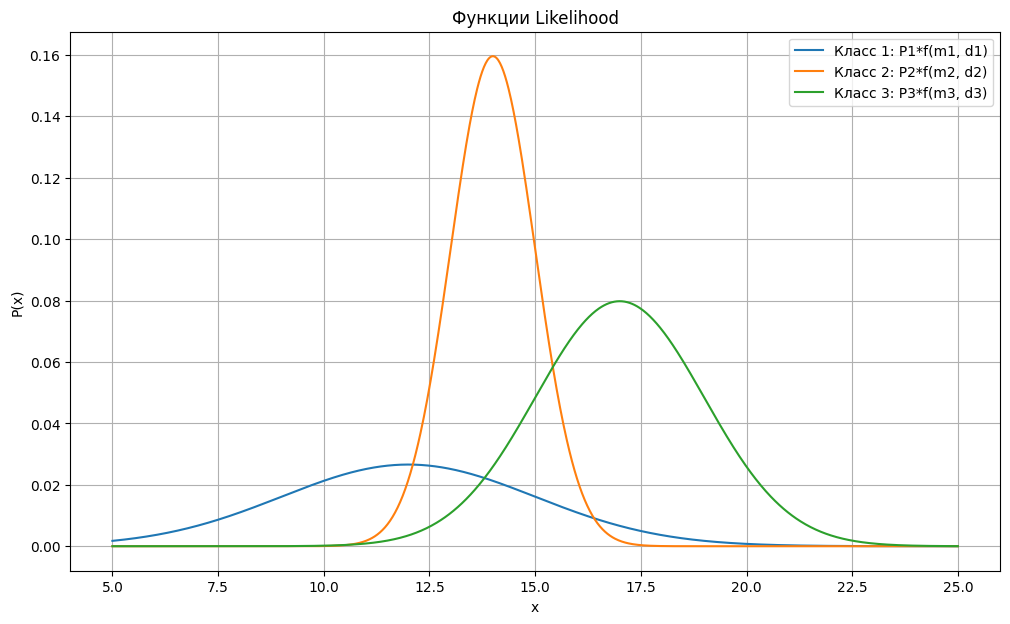

In [2]:
# Генерируем набор точек для графика
x = np.linspace(5, 25, 1000)

# Вычисляем значения функции правдоподобия для каждого класса
P1_x = likelihood(x, P1, m1, d1)
P2_x = likelihood(x, P2, m2, d2)
P3_x = likelihood(x, P3, m3, d3)

# Строим графики
plt.figure(figsize=(12, 7))

plt.plot(x, P1_x, label='Класс 1: P1*f(m1, d1)')
plt.plot(x, P2_x, label='Класс 2: P2*f(m2, d2)')
plt.plot(x, P3_x, label='Класс 3: P3*f(m3, d3)')

plt.title('Функции Likelihood')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.grid(True)

# Показываем график
plt.show()

# 3. Указать на графике все полученные **разделяющие точки**.

Для этого также используем Matplotlib.

По мимо этого можно сразу закрасить области решения для каждого класса, чтобы потом было легче написать ответ.

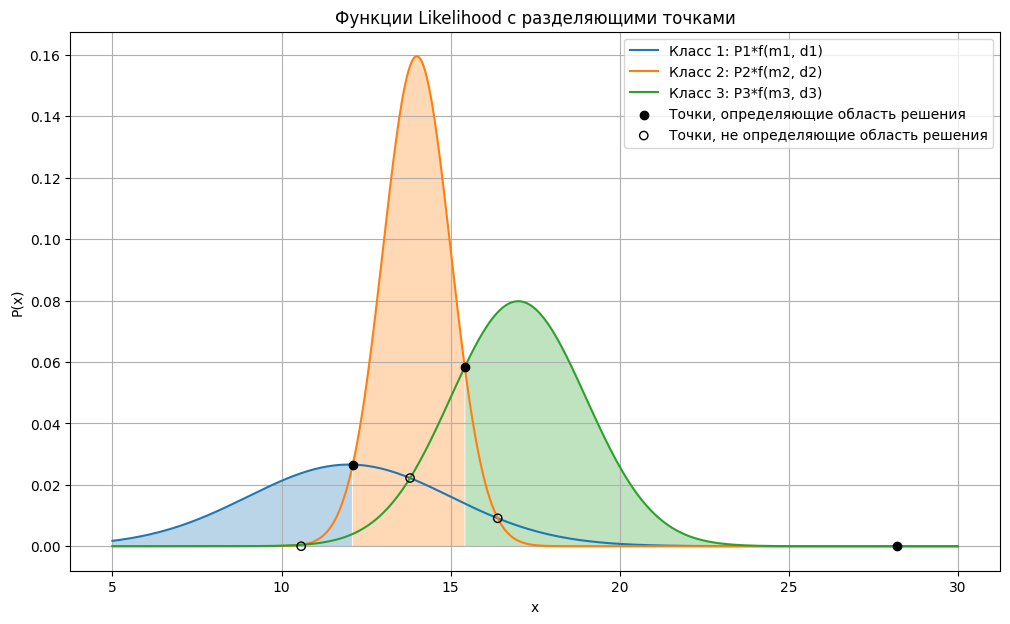

In [4]:
class1_region = x[x < intersection_1_2[0]]
class2_region = x[(x >= intersection_1_2[0]) & (x < intersection_2_3[0])]
class3_region = x[x >= intersection_2_3[0]]

# Генерируем набор точек для графика
x = np.linspace(5, 30, 1000)

# Вычисляем значения функции правдоподобия для каждого класса
P1_x = likelihood(x, P1, m1, d1)
P2_x = likelihood(x, P2, m2, d2)
P3_x = likelihood(x, P3, m3, d3)

# Строим графики
plt.figure(figsize=(12, 7))

plt.plot(x, P1_x, label='Класс 1: P1*f(m1, d1)')
plt.plot(x, P2_x, label='Класс 2: P2*f(m2, d2)')
plt.plot(x, P3_x, label='Класс 3: P3*f(m3, d3)')

# Закрашиваем области решений для каждого класса
plt.fill_between(class1_region, likelihood(class1_region, P1, m1, d1), alpha=0.3)
plt.fill_between(class2_region, likelihood(class2_region, P2, m2, d2), alpha=0.3)
plt.fill_between(class3_region, likelihood(class3_region, P3, m3, d3), alpha=0.3)

# Показываем разделяющие точки на графике
plt.scatter(intersection_1_2[0], likelihood(intersection_1_2[0], P2, m2, d2), color='black', zorder=5, label='Точки, определяющие область решения')
plt.scatter(intersection_1_3[0], likelihood(intersection_1_3[0], P1, m1, d1), facecolors='none', edgecolors='black', zorder=5, marker='o', label='Точки, не определяющие область решения')
plt.scatter(intersection_1_3[1], likelihood(intersection_1_3[1], P1, m1, d1), color='black', zorder=5)
plt.scatter(intersection_1_2[1], likelihood(intersection_1_2[1], P1, m1, d1), facecolors='none', edgecolors='black', zorder=5, marker='o')
plt.scatter(intersection_2_3[1], likelihood(intersection_1_3[1], P1, m1, d1), facecolors='none', edgecolors='black', zorder=5, marker='o')
plt.scatter(intersection_2_3[0], likelihood(intersection_2_3[0], P3, m3, d3), color='black', zorder=5)

plt.title('Функции Likelihood с разделяющими точками')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.grid(True)

# Показываем график
plt.show()

На графике показаны функции правдоподобия для всех трех классов с закрашенными областями решений:

* Синяя область соответствует классу 1 и ограничена справа разделяющей точкой $x≈12.11$.
* Оранжевая область соответствует классу 2 и находится между разделяющими точками $x≈12.11$ и $x≈15.42$.
* Зеленая область соответствует классу 3 и начинается от разделяющей точки $x≈15.42$ и продолжается вправо до точки $x≈28.2$.

Черные точки обозначают разделяющие границы между классами (определяют область решений). Выколотые точки не определяют область решений.

# 4. Выбрать точки, соответсвующие границам классов, и записать ответ в виде отрезков (или полуинтервалов), соответсвующих каждому из трех классов.

Исходя из найденных точек разделения и ориентируясь по графику, мы можем определить следующие границы для классов:
* Класс 1:
$(0, 12.11)$ и $[28.2, +∞)$ – значения меньше первой разделяющей точки.
* Класс 2:
$[12.11,15.42)$ – значения от первой до второй разделяющей точки.
* Класс 3:
$[15.42,28.2]$ – значения больше второй разделяющей точки.

Эти интервалы представляют собой отрезки или полуинтервалы, на которых классификатор будет принимать решение о принадлежности к определенному классу. Если значение x попадает в один из этих интервалов, то оно классифицируется соответственно.